In [1]:
import matplotlib.pyplot as plt
import equations as eq
import sympy as sp
from solvers import *

%matplotlib inline

To build the discrete operator

\begin{equation}
A = a(x, y)\partial_x^2 + b(x, y)\partial_y^2 + \alpha(x, y)\partial_x + \beta(x, y)\partial_y + q(x, y) \partial_x\partial_y
\end{equation}

with the exact solution

\begin{equation}
u(x, y) = u_{\sf exact}
\end{equation}

fill coefficients and exact solution in the following template

In [2]:
def my_favourite_equation(L_x, L_y):
    x, y = sp.symbols('x, y', real=True)
    a = .0
    b = .0
    alpha = .0
    beta = .0
    q = .0
    exact = .0
    return eq.construct_equation(a, b, alpha, beta, q, exact, x, y, L_x, L_y)

Here $L_x, L_y$ define the physical space $x, y \in \left[0, L_x\right]\times\left[0, L_y\right]$.

As an example we consider the following equation

\begin{equation}
    \cosh(x y)\partial^2_x + \left[1 + \cos(\pi x^2 y)\right]^2 \partial_y^2 + \exp(x)\partial_x + \exp(y)\partial_y + (1-x)(1-y)\partial_x\partial_y,
\end{equation}

\begin{equation}
    u_{\sf exact} = x + y + 3x^3
\end{equation}

In [3]:
def equation_1633(L_x, L_y):
    x, y = sp.symbols('x, y', real=True)
    a = sp.cosh(x*y)
    b = (1 + sp.cos(sp.pi*x**2*y))**2
    alpha = sp.exp(x)
    beta = sp.exp(y)
    q = (1-x)*(1-y)
    exact = x + y + 3*x**3
    return eq.construct_equation(a, b, alpha, beta, q, exact, x, y, L_x, L_y)

When equation is defined we pass it to the function that construct ``coo_matrix``

In [4]:
J = 5
n_x = n_y = 2**5
h = 2**-5

A, rhs, exact = eq.construct_matrix(equation_1633, 'Dirichlet', 1, 1, n_x, n_y)

We convert ``coo_matrix`` to dense format of ``numpy``

In [5]:
A = A.toarray()

Now, we can run available solvers.

BiCGSTAB (scipy)

In [6]:
solution, E_CG = BICGSTAB(A, rhs, tol=1e-15, verbose=True, write=True)

Iteration #1
      error = 6e+03
Iteration #2
      error = 2.6e+03
Iteration #3
      error = 1.7e+03
Iteration #4
      error = 1.2e+03
Iteration #5
      error = 9.7e+02
Iteration #6
      error = 7.9e+02
Iteration #7
      error = 7.1e+02
Iteration #8
      error = 5.9e+02
Iteration #9
      error = 5.1e+02
Iteration #10
      error = 4.6e+02
Iteration #11
      error = 3.8e+02
Iteration #12
      error = 3.4e+02
Iteration #13
      error = 3e+02
Iteration #14
      error = 2.7e+02
Iteration #15
      error = 2.4e+02
Iteration #16
      error = 2.1e+02
Iteration #17
      error = 2e+02
Iteration #18
      error = 1.9e+02
Iteration #19
      error = 1.9e+02
Iteration #20
      error = 1.7e+02
Iteration #21
      error = 1.6e+02
Iteration #22
      error = 1.5e+02
Iteration #23
      error = 1.3e+02
Iteration #24
      error = 1.2e+02
Iteration #25
      error = 1e+02
Iteration #26
      error = 9.6e+01
Iteration #27
      error = 8.6e+01
Iteration #28
      error = 8e+01
Iteration #

In [7]:
np.linalg.norm(solution - exact)

0.002945284470468839

Gauss-Seidel

In [8]:
solution, E_GS = GS(A, rhs, tol=h**2, verbose=True, write=True)

Iteration #1
      error = 5.6e+03
Iteration #2
      error = 2.9e+03
Iteration #3
      error = 1.9e+03
Iteration #4
      error = 1.6e+03
Iteration #5
      error = 1.3e+03
Iteration #6
      error = 1.1e+03
Iteration #7
      error = 9.7e+02
Iteration #8
      error = 8.4e+02
Iteration #9
      error = 7.3e+02
Iteration #10
      error = 6.6e+02
Iteration #11
      error = 6.2e+02
Iteration #12
      error = 5.7e+02
Iteration #13
      error = 5.3e+02
Iteration #14
      error = 4.9e+02
Iteration #15
      error = 4.5e+02
Iteration #16
      error = 4.2e+02
Iteration #17
      error = 3.9e+02
Iteration #18
      error = 3.7e+02
Iteration #19
      error = 3.5e+02
Iteration #20
      error = 3.3e+02
Iteration #21
      error = 3.2e+02
Iteration #22
      error = 3e+02
Iteration #23
      error = 2.9e+02
Iteration #24
      error = 2.7e+02
Iteration #25
      error = 2.6e+02
Iteration #26
      error = 2.5e+02
Iteration #27
      error = 2.4e+02
Iteration #28
      error = 2.3e+02
Ite

Iteration #245
      error = 1.4e+01
Iteration #246
      error = 1.3e+01
Iteration #247
      error = 1.3e+01
Iteration #248
      error = 1.3e+01
Iteration #249
      error = 1.3e+01
Iteration #250
      error = 1.3e+01
Iteration #251
      error = 1.3e+01
Iteration #252
      error = 1.3e+01
Iteration #253
      error = 1.3e+01
Iteration #254
      error = 1.2e+01
Iteration #255
      error = 1.2e+01
Iteration #256
      error = 1.2e+01
Iteration #257
      error = 1.2e+01
Iteration #258
      error = 1.2e+01
Iteration #259
      error = 1.2e+01
Iteration #260
      error = 1.2e+01
Iteration #261
      error = 1.2e+01
Iteration #262
      error = 1.2e+01
Iteration #263
      error = 1.1e+01
Iteration #264
      error = 1.1e+01
Iteration #265
      error = 1.1e+01
Iteration #266
      error = 1.1e+01
Iteration #267
      error = 1.1e+01
Iteration #268
      error = 1.1e+01
Iteration #269
      error = 1.1e+01
Iteration #270
      error = 1.1e+01
Iteration #271
      error = 1.1e+01
I

Iteration #508
      error = 1.1
Iteration #509
      error = 1.1
Iteration #510
      error = 1.1
Iteration #511
      error = 1.1
Iteration #512
      error = 1.1
Iteration #513
      error = 1.0
Iteration #514
      error = 1.0
Iteration #515
      error = 1.0
Iteration #516
      error = 1.0
Iteration #517
      error = 1.0
Iteration #518
      error = 1.0
Iteration #519
      error = 0.99
Iteration #520
      error = 0.98
Iteration #521
      error = 0.97
Iteration #522
      error = 0.96
Iteration #523
      error = 0.95
Iteration #524
      error = 0.95
Iteration #525
      error = 0.94
Iteration #526
      error = 0.93
Iteration #527
      error = 0.92
Iteration #528
      error = 0.91
Iteration #529
      error = 0.9
Iteration #530
      error = 0.89
Iteration #531
      error = 0.88
Iteration #532
      error = 0.88
Iteration #533
      error = 0.87
Iteration #534
      error = 0.86
Iteration #535
      error = 0.85
Iteration #536
      error = 0.84
Iteration #537
      error

Iteration #760
      error = 0.098
Iteration #761
      error = 0.097
Iteration #762
      error = 0.096
Iteration #763
      error = 0.095
Iteration #764
      error = 0.094
Iteration #765
      error = 0.093
Iteration #766
      error = 0.093
Iteration #767
      error = 0.092
Iteration #768
      error = 0.091
Iteration #769
      error = 0.09
Iteration #770
      error = 0.089
Iteration #771
      error = 0.088
Iteration #772
      error = 0.087
Iteration #773
      error = 0.087
Iteration #774
      error = 0.086
Iteration #775
      error = 0.085
Iteration #776
      error = 0.084
Iteration #777
      error = 0.083
Iteration #778
      error = 0.082
Iteration #779
      error = 0.082
Iteration #780
      error = 0.081
Iteration #781
      error = 0.08
Iteration #782
      error = 0.079
Iteration #783
      error = 0.079
Iteration #784
      error = 0.078
Iteration #785
      error = 0.077
Iteration #786
      error = 0.076
Iteration #787
      error = 0.076
Iteration #788
      e

Iteration #1011
      error = 0.0087
Iteration #1012
      error = 0.0087
Iteration #1013
      error = 0.0086
Iteration #1014
      error = 0.0085
Iteration #1015
      error = 0.0084
Iteration #1016
      error = 0.0083
Iteration #1017
      error = 0.0082
Iteration #1018
      error = 0.0082
Iteration #1019
      error = 0.0081
Iteration #1020
      error = 0.008
Iteration #1021
      error = 0.0079
Iteration #1022
      error = 0.0079
Iteration #1023
      error = 0.0078
Iteration #1024
      error = 0.0077
Iteration #1025
      error = 0.0076
Iteration #1026
      error = 0.0076
Iteration #1027
      error = 0.0075
Iteration #1028
      error = 0.0074
Iteration #1029
      error = 0.0073
Iteration #1030
      error = 0.0073
Iteration #1031
      error = 0.0072
Iteration #1032
      error = 0.0071
Iteration #1033
      error = 0.0071
Iteration #1034
      error = 0.007
Iteration #1035
      error = 0.0069
Iteration #1036
      error = 0.0069
Iteration #1037
      error = 0.0068
Ite

Iteration #1235
      error = 0.001
Iteration #1236
      error = 0.001
Iteration #1237
      error = 0.00099
Iteration #1238
      error = 0.00098
Iteration #1239
      error = 0.00097


In [9]:
np.linalg.norm(solution - exact)

0.00268087828815313

Belief propagation split solver (see the article for details)

In [10]:
solution, E_split = split_BP_solver(A, rhs, tol=h**2, verbose=True, write=True)

Iteration #1
      error = 1.8e+03
Iteration #2
      error = 8.3e+02
Iteration #3
      error = 4.6e+02
Iteration #4
      error = 2.6e+02
Iteration #5
      error = 1.5e+02
Iteration #6
      error = 8.5e+01
Iteration #7
      error = 4.9e+01
Iteration #8
      error = 2.8e+01
Iteration #9
      error = 1.6e+01
Iteration #10
      error = 9.0
Iteration #11
      error = 5.1
Iteration #12
      error = 2.9
Iteration #13
      error = 1.6
Iteration #14
      error = 0.92
Iteration #15
      error = 0.52
Iteration #16
      error = 0.29
Iteration #17
      error = 0.17
Iteration #18
      error = 0.093
Iteration #19
      error = 0.052
Iteration #20
      error = 0.03
Iteration #21
      error = 0.017
Iteration #22
      error = 0.0094
Iteration #23
      error = 0.0053
Iteration #24
      error = 0.003
Iteration #25
      error = 0.0017
Iteration #26
      error = 0.00094


In [11]:
np.linalg.norm(solution - exact)

0.002932809634837446

In [12]:
solution_1, E_BP = GaBP(A, rhs, tol=h**2, verbose=True, write=True)

Iteration #1, error = 6.8e+03
Iteration #2, error = 5.2e+03
Iteration #3, error = 3.7e+03
Iteration #4, error = 2.6e+03
Iteration #5, error = 1.6e+03
Iteration #6, error = 9.7e+02
Iteration #7, error = 6.9e+02
Iteration #8, error = 5.4e+02
Iteration #9, error = 4.4e+02
Iteration #10, error = 3.6e+02
Iteration #11, error = 3.2e+02
Iteration #12, error = 2.9e+02
Iteration #13, error = 2.7e+02
Iteration #14, error = 2.5e+02
Iteration #15, error = 2.2e+02
Iteration #16, error = 2.1e+02
Iteration #17, error = 1.9e+02
Iteration #18, error = 1.8e+02
Iteration #19, error = 1.7e+02
Iteration #20, error = 1.6e+02
Iteration #21, error = 1.5e+02
Iteration #22, error = 1.4e+02
Iteration #23, error = 1.4e+02
Iteration #24, error = 1.3e+02
Iteration #25, error = 1.3e+02
Iteration #26, error = 1.2e+02
Iteration #27, error = 1.2e+02
Iteration #28, error = 1.1e+02
Iteration #29, error = 1.1e+02
Iteration #30, error = 1.1e+02
Iteration #31, error = 1e+02
Iteration #32, error = 1e+02
Iteration #33, error 

Iteration #280, error = 0.21
Iteration #281, error = 0.21
Iteration #282, error = 0.2
Iteration #283, error = 0.2
Iteration #284, error = 0.19
Iteration #285, error = 0.19
Iteration #286, error = 0.19
Iteration #287, error = 0.18
Iteration #288, error = 0.18
Iteration #289, error = 0.17
Iteration #290, error = 0.17
Iteration #291, error = 0.16
Iteration #292, error = 0.16
Iteration #293, error = 0.16
Iteration #294, error = 0.15
Iteration #295, error = 0.15
Iteration #296, error = 0.15
Iteration #297, error = 0.14
Iteration #298, error = 0.14
Iteration #299, error = 0.14
Iteration #300, error = 0.13
Iteration #301, error = 0.13
Iteration #302, error = 0.13
Iteration #303, error = 0.12
Iteration #304, error = 0.12
Iteration #305, error = 0.12
Iteration #306, error = 0.11
Iteration #307, error = 0.11
Iteration #308, error = 0.11
Iteration #309, error = 0.11
Iteration #310, error = 0.1
Iteration #311, error = 0.1
Iteration #312, error = 0.099
Iteration #313, error = 0.097
Iteration #314, 

In [13]:
np.linalg.norm(solution - exact)

0.002932809634837446

For other available solvers see the notebook that reproduces figures from the article.

Now it is possible to access convergence history. For example for the split solver

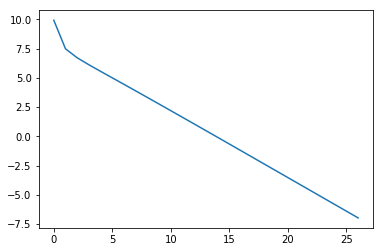

In [14]:
plt.plot(np.log(E_split))

or for the Gaussian belief propagation solver

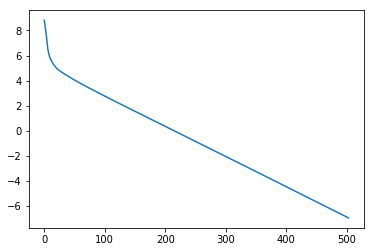

In [15]:
plt.plot(np.log(E_BP))